## **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re 
import nltk 
import seaborn as sns

from sklearn import pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report



In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Read data from csv file
train=pd.read_csv("/content/drive/MyDrive/ProjectAI/Data/Uncleaned/Corona_NLP_train.csv",encoding='latin1')
test=pd.read_csv("/content/drive/MyDrive/ProjectAI/Data/Uncleaned/Corona_NLP_test.csv",encoding='latin1')

In [ ]:
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


## **Preprocessing**

In [ ]:
# Mapping labels to 0 , 1 , 2 for Negative, Neutral, Positive
mapping = {'Extremely Negative': 0, 'Negative': 0, 'Neutral': 1, 'Positive' :2, 'Extremely Positive' :2}
    
# Create column labels
train['labels'] = train['Sentiment'].map(mapping)
test['labels'] = test['Sentiment'].map(mapping)


train.labels.value_counts(normalize= True)

2    0.438467
0    0.374128
1    0.187404
Name: labels, dtype: float64

In [ ]:
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,labels
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,1
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,2
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,2
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,2
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,1
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,0
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,2
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,1


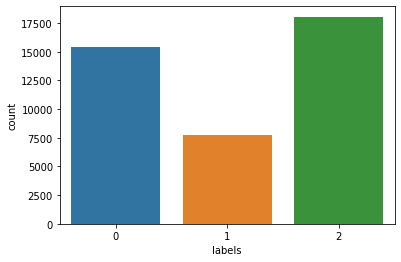

In [ ]:
sns.countplot(x = train['labels'] ,data=train)

In [ ]:
test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,labels
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,0
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,2
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,2
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,0
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,1
...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,2
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,0
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,1
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,0


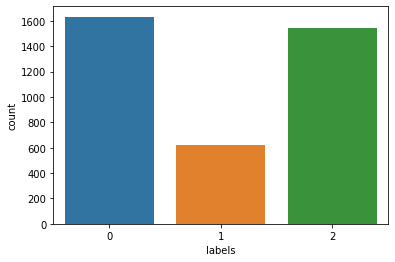

In [ ]:
sns.countplot(x = test['labels'] ,data=test)

In [ ]:
# Create clean data functions

# Remove Urls 
def remove_urls(text):
    url_remove = re.compile(r'http\S+')
    return url_remove.sub(r'', text)

# Remove hashtag
def remove_hash(x):
    text=re.sub(r'#\w+','',x)
    return text

# Remove html
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Lower casing
def lower(text):
    low_text= text.lower()
    return low_text



# Remove number
def remove_num(text):
    remove= re.sub(r'\d+', '', text)
    return remove


#Remove punctuations
def punct_remove(text):
    punct = re.sub(r"[^\w\s\d]","", text)
    return punct

#Remove stopwords 
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


#Remove mentions 
def remove_mention(x):
    
    text=re.sub(r'@\w+','',x)
    return text



#Remove extra white space left while removing stuff
def remove_space(text):
    space_remove = re.sub(r"\s+"," ",text).strip()
    return space_remove



In [ ]:
# Apply functions and create column text

train['text']=train['OriginalTweet'].apply(lambda x: remove_urls(remove_hash(remove_html(remove_mention(remove_num(remove_space(remove_stopwords(lower(punct_remove(x))))))))))
test['text']=test['OriginalTweet'].apply(lambda x: remove_urls(remove_hash(remove_html(remove_mention(remove_num(remove_space(remove_stopwords(lower(punct_remove(x))))))))))

In [ ]:
# Delete columns except text and labels
train.drop(['UserName',	'ScreenName',	'Location',	'TweetAt'	,'Sentiment','OriginalTweet'], inplace = True, axis =1)
test.drop(['UserName',	'ScreenName',	'Location',	'TweetAt'	,'Sentiment','OriginalTweet'], inplace = True, axis =1)

In [ ]:
train

,labels,text
0,1,menyrbie phil_gahan chrisitv
1,2,advice talk neighbours family exchange phone n...
2,2,coronavirus australia woolworths give elderly ...
3,2,food stock one empty please dont panic enough ...
4,0,ready go supermarket covid outbreak im paranoi...
...,...,...
41152,1,airline pilots offering stock supermarket shel...
41153,0,response complaint provided citing covid relat...
41154,2,know itâs getting tough kameronwilds rationing...
41155,1,wrong smell hand sanitizer starting turn coron...


In [ ]:
test

,labels,text
0,0,trending new yorkers encounter empty supermark...
1,2,couldnt find hand sanitizer fred meyer turned ...
2,2,find protect loved ones coronavirus
3,0,panic buying hits newyork city anxious shopper...
4,1,toiletpaper dunnypaper coronavirus coronavirus...
...,...,...
3793,2,meanwhile supermarket israel people dance sing...
3794,0,panic buy lot nonperishable items echo needs f...
3795,1,asst prof economics cconces nbcphiladelphia ta...
3796,0,gov need somethings instead biar je rakyat ass...


In [ ]:
# Save cleaned data to csv file

train.to_csv("/content/drive/MyDrive/ProjectAI/Data/Cleaned/clean_train.csv", index=False)
test.to_csv("/content/drive/MyDrive/ProjectAI/Data/Cleaned/clean_test.csv",index= False)